findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

fish_length 와 fish_weight가 잘 연결되었는지 확인 : 
 [[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]] 


타깃 데이터가 잘 생성되었는지 확인 : 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.] 


입력 데이터 크기 확인 : 
 (36, 2) (13, 2) 


타깃 데이터 크기 확인 : 
 (36,) (13,) 


도미와 빙어가 잘 섞였는지 테스트 데이터 : 
 [0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.] 


모델을 테스트 세트에서 평가 :  1.0
새로운 도미 데이터 예측 :  [0.]


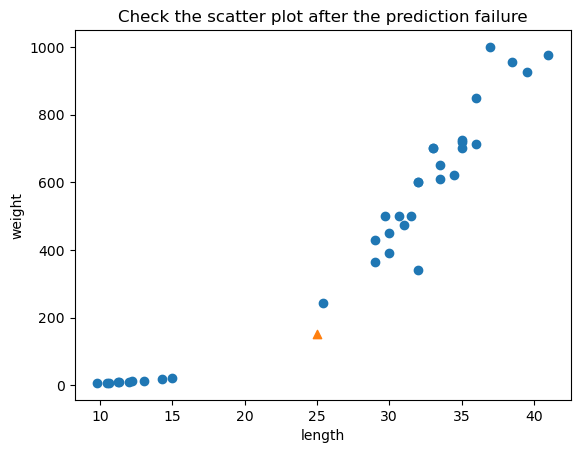

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = np.column_stack((fish_length, fish_weight))

# fish_length 하고 fish_weight가 잘 연결되었는지 처음 5개 데이터로 확인
print("fish_length 와 fish_weight가 잘 연결되었는지 확인 : \n",fish_data[:5], "\n\n")

# np.ones, np.zeros, np.concatenate 함수를 사용해서 타깃 데이터 생성
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print("타깃 데이터가 잘 생성되었는지 확인 : \n",fish_target,"\n\n")

# 훈련 세트와 테스트 세트 분류
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target,
                                                                      stratify = fish_target,
                                                                      random_state = 42)

# 잘 나뉘었는지 넘파이 배열의 shape 속성으로 입력, 타깃 데이터 크기 출력
print("입력 데이터 크기 확인 : \n",train_input.shape, test_input.shape, "\n\n")
print("타깃 데이터 크기 확인 : \n",train_target.shape, test_target.shape, "\n\n")

# 도미와 빙어가 잘 섞였는지 테스트 데이터 출력
print("도미와 빙어가 잘 섞였는지 테스트 데이터 : \n",test_target, "\n\n")

# 앞서 준비한 데이터로 KNN 훈련 시작. 훈련 데이터로 모델을 훈련하고 테스트 데이터로 모델을 평가
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)

# 모델을 테스트 세트에서 평가
print("모델을 테스트 세트에서 평가 : ", kn.score(test_input, test_target))

# 해당 모델에 새로운 도미 데이터를 넣고 결과 확인
print("새로운 도미 데이터 예측 : ", kn.predict([[25, 150]]))  # 예측 실패

# 예측 실패 후 산점도 확인
plt.title("Check the scatter plot after the prediction failure")
plt.scatter(train_input[:,0], train_input[:, 1])
plt.scatter(25, 150, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 문제 해결 과정

1. 일단 산점도 확인 후 가장 가까운 데이터 확인
2. 어떤 데이터들이 더 가까운가?

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

타깃 데이터 확인 :  [[1. 0. 0. 0. 0.]]
이웃 샘플까지의 거리들 :  [[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


findfont: Font family 'NanumGothic' not found.


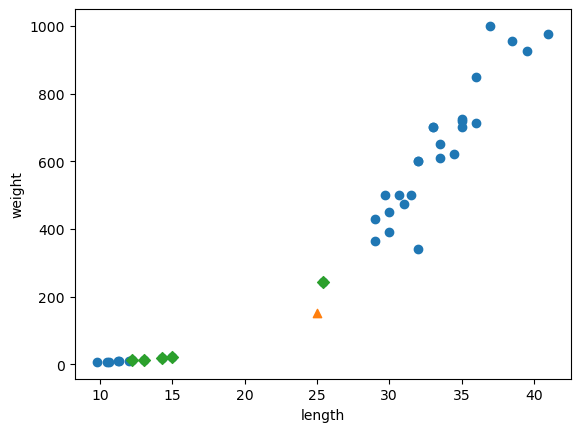

In [21]:
distance, indexes = kn.kneighbors([[25, 150]])

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')

print("타깃 데이터 확인 : ", train_target[indexes])
print("이웃 샘플까지의 거리들 : ", distance)

# 문제 확인

산점도를 확인해 보니 x축은 범위가 좁고(10~40), y축은 범위가 넓은 것을 확인할 수 있었다(0~1000)

따라서 y축으로 조금만 멀어져도 거리가 아주 큰 값으로 계산되겠다. 이 때문에 오른쪽 위의 도미 샘플이 이웃으로 선택되지 못했던 것이다.